In [36]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

This is the typical chunk of data that you can get from the LIGO public data release:
https://losc.ligo.org/archive/O1/

In [37]:
filename = 'L-L1_LOSC_4_V1-1126072320-4096.hdf5'
dataFile=h5py.File(filename, 'r')

In [39]:
dict(dataFile)

{'meta': <HDF5 group "/meta" (8 members)>,
 'quality': <HDF5 group "/quality" (3 members)>,
 'strain': <HDF5 group "/strain" (1 members)>}

The main interesting field is the timeseries recorded:

In [40]:
dict(dataFile['strain'])

{'Strain': <HDF5 dataset "Strain": shape (16777216,), type "<f8">}

In [41]:
strain = dataFile['strain']['Strain']
strain.attrs['Xspacing']

0.000244140625

Text(0,0.5,'Strain signal $h(t)$')

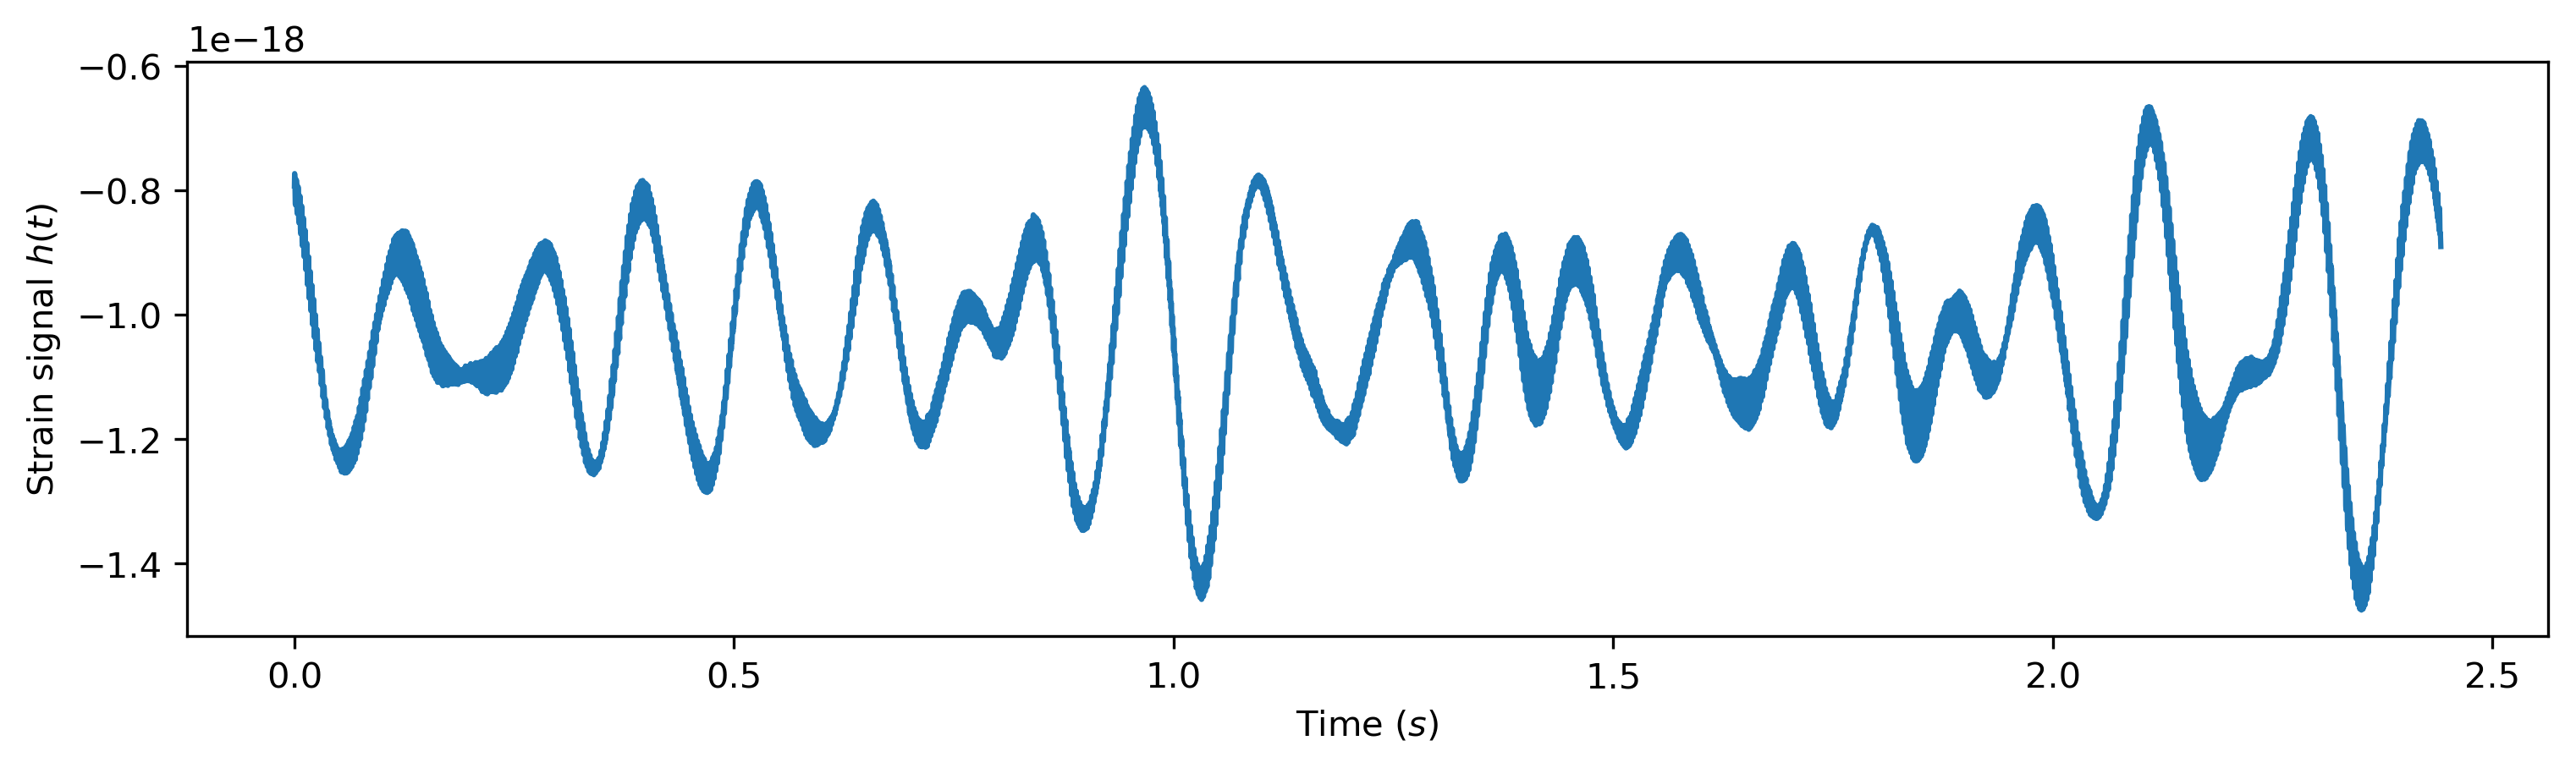

In [42]:
idx_start=0
idx_stop=10000
ts = dataFile['strain']['Strain'].attrs['Xspacing']

time = np.linspace(idx_start*ts, idx_stop*ts, idx_stop)

fig = plt.figure(1, figsize=(12,3), dpi=300)
plt.plot(time,strain[idx_start:idx_stop])
plt.xlabel(r"Time $(s)$")
plt.ylabel(r"Strain signal $h(t)$")

Some meta parameters describes the overall configuration of the instrument.

In [43]:
dict(dataFile['meta'])

{'Description': <HDF5 dataset "Description": shape (), type "|O">,
 'DescriptionURL': <HDF5 dataset "DescriptionURL": shape (), type "|O">,
 'Detector': <HDF5 dataset "Detector": shape (), type "|O">,
 'Duration': <HDF5 dataset "Duration": shape (), type "<i8">,
 'GPSstart': <HDF5 dataset "GPSstart": shape (), type "<i8">,
 'Observatory': <HDF5 dataset "Observatory": shape (), type "|O">,
 'Type': <HDF5 dataset "Type": shape (), type "|O">,
 'UTCstart': <HDF5 dataset "UTCstart": shape (), type "|O">}

Some other describe flags on data quality, injections, etc. 

In [44]:
dict(dataFile['quality'])

{'detail': <HDF5 group "/quality/detail" (0 members)>,
 'injections': <HDF5 group "/quality/injections" (3 members)>,
 'simple': <HDF5 group "/quality/simple" (3 members)>}

In [45]:
dataFile.close()